In [2]:
# libraries
import pandas as pd
import seaborn as sns
sns.set_style("white")

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import joypy

from matplotlib import cm

%matplotlib inline

# DATA

In [73]:
#final dataset September 2020
df = pd.read_csv('/Users/isabelle/Downloads/DGRP-June2020/Sept2020/DGRPfinal.csv')
df = df.drop(["comments"], axis=1)
df.head()

,id,control_experiment,line,block,day_of_starvation,sex,wing,cell,leg,pupa
0,365-A-0-F-031,EXPERIMENT,365,5,0,F,1430392,78,1001.289,NaN
1,365-A-1-M-045,EXPERIMENT,365,5,1,M,893533.5,89,838.3077,NaN
2,712-A-0-F-013,EXPERIMENT,712,5,0,F,1270679,73,982.314,NaN
3,774-B-0-F-055,EXPERIMENT,774,5,0,F,1523000,81,991.0491,NaN
4,774-B-2-F-094,EXPERIMENT,774,5,2,F,1104017,86,867.8839,NaN


## Variables

## Data prep

In [80]:
#removing all characters from wing, cell and leg columns (due to missing data), and replacing them by NA value
df['wing'] = df['wing'].replace('[A-Z]+', np.NaN, regex = True)
df['cell'] = df['cell'].replace('[A-Z]+', np.NaN, regex = True)
df['cell'] = df['cell'].replace('[a-z]+', np.NaN, regex = True) #there are also lower case characters in cell column
df['leg'] = df['leg'].replace('[A-Z]+',np.NaN, regex = True) 
df['leg'] = df['leg'].replace('[a-z]+',np.NaN, regex = True) 
df['leg'] = df['leg'].replace(r'^\s*$', np.nan, regex=True)
df['pupa'] = df['pupa'].replace('[A-Z]+',np.NaN, regex = True) 
df['pupa'] = df['pupa'].replace('[a-z]+',np.NaN, regex = True) 
df['pupa'] = df['pupa'].replace(r'^\s*$', np.nan, regex=True)

In [81]:
#changing wing, cell and leg data type to float
df['wing'] = df["wing"].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26379 entries, 0 to 26378
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  26379 non-null  object 
 1   control_experiment  26379 non-null  object 
 2   line                26379 non-null  int64  
 3   block               26379 non-null  int64  
 4   day_of_starvation   26379 non-null  int64  
 5   sex                 26379 non-null  object 
 6   wing                25682 non-null  float64
 7   cell                26121 non-null  float64
 8   leg                 25481 non-null  float64
 9   pupa                23721 non-null  float64
 10  legpow2             25481 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.2+ MB


In [82]:
df['cell'] = df["cell"].astype(float
                    ) #removed "can't see" manually in cvs 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26379 entries, 0 to 26378
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  26379 non-null  object 
 1   control_experiment  26379 non-null  object 
 2   line                26379 non-null  int64  
 3   block               26379 non-null  int64  
 4   day_of_starvation   26379 non-null  int64  
 5   sex                 26379 non-null  object 
 6   wing                25682 non-null  float64
 7   cell                26121 non-null  float64
 8   leg                 25481 non-null  float64
 9   pupa                23721 non-null  float64
 10  legpow2             25481 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.2+ MB


In [83]:
df['leg'] = df["leg"].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26379 entries, 0 to 26378
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  26379 non-null  object 
 1   control_experiment  26379 non-null  object 
 2   line                26379 non-null  int64  
 3   block               26379 non-null  int64  
 4   day_of_starvation   26379 non-null  int64  
 5   sex                 26379 non-null  object 
 6   wing                25682 non-null  float64
 7   cell                26121 non-null  float64
 8   leg                 25481 non-null  float64
 9   pupa                23721 non-null  float64
 10  legpow2             25481 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.2+ MB


In [84]:
df['pupa'] = df["pupa"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26379 entries, 0 to 26378
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  26379 non-null  object 
 1   control_experiment  26379 non-null  object 
 2   line                26379 non-null  int64  
 3   block               26379 non-null  int64  
 4   day_of_starvation   26379 non-null  int64  
 5   sex                 26379 non-null  object 
 6   wing                25682 non-null  float64
 7   cell                26121 non-null  float64
 8   leg                 25481 non-null  float64
 9   pupa                23721 non-null  float64
 10  legpow2             25481 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.2+ MB


In [85]:
#squared leg measurements to be in the same dimensions as the wing size
df['legpow2'] = df['leg'].astype(float)**2
df.head()

,id,control_experiment,line,block,day_of_starvation,sex,wing,cell,leg,pupa,legpow2
0,365-A-0-F-031,EXPERIMENT,365,5,0,F,1430392.0,78.0,1001.2890,NaN,1.002580e+06
1,365-A-1-M-045,EXPERIMENT,365,5,1,M,893533.5,89.0,838.3077,NaN,7.027598e+05
2,712-A-0-F-013,EXPERIMENT,712,5,0,F,1270679.0,73.0,982.3140,NaN,9.649408e+05
3,774-B-0-F-055,EXPERIMENT,774,5,0,F,1523000.0,81.0,991.0491,NaN,9.821783e+05
4,774-B-2-F-094,EXPERIMENT,774,5,2,F,1104017.0,86.0,867.8839,NaN,7.532225e+05


In [86]:
#calculating ln
df['lnwing'] = np.log(df['wing'])
df['lnleg'] = np.log(df['leg'])
df['lnlegpow2'] = np.log(df['legpow2'])
df['lnpupa'] = np.log(df['pupa'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26379 entries, 0 to 26378
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  26379 non-null  object 
 1   control_experiment  26379 non-null  object 
 2   line                26379 non-null  int64  
 3   block               26379 non-null  int64  
 4   day_of_starvation   26379 non-null  int64  
 5   sex                 26379 non-null  object 
 6   wing                25682 non-null  float64
 7   cell                26121 non-null  float64
 8   leg                 25481 non-null  float64
 9   pupa                23721 non-null  float64
 10  legpow2             25481 non-null  float64
 11  lnwing              25682 non-null  float64
 12  lnleg               25481 non-null  float64
 13  lnlegpow2           25481 non-null  float64
 14  lnpupa              23721 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 3.0+

,id,control_experiment,line,block,day_of_starvation,sex,wing,cell,leg,pupa,legpow2,lnwing,lnleg,lnlegpow2,lnpupa
0,365-A-0-F-031,EXPERIMENT,365,5,0,F,1430392.0,78.0,1001.2890,NaN,1.002580e+06,14.173459,6.909043,13.818087,NaN
1,365-A-1-M-045,EXPERIMENT,365,5,1,M,893533.5,89.0,838.3077,NaN,7.027598e+05,13.702939,6.731385,13.462770,NaN
2,712-A-0-F-013,EXPERIMENT,712,5,0,F,1270679.0,73.0,982.3140,NaN,9.649408e+05,14.055062,6.889911,13.779822,NaN
3,774-B-0-F-055,EXPERIMENT,774,5,0,F,1523000.0,81.0,991.0491,NaN,9.821783e+05,14.236193,6.898764,13.797528,NaN
4,774-B-2-F-094,EXPERIMENT,774,5,2,F,1104017.0,86.0,867.8839,NaN,7.532225e+05,13.914466,6.766058,13.532116,NaN


In [92]:
#export prepared data to CSV for R stats
df.to_csv('/Users/isabelle/Downloads/DGRP-June2020/Sept2020/DGRPfinal_clean.csv')

In [87]:
#subset experiment only flies
df_exp = df[(df['control_experiment'] == 'EXPERIMENT')]
df_exp.head()

,id,control_experiment,line,block,day_of_starvation,sex,wing,cell,leg,pupa,legpow2,lnwing,lnleg,lnlegpow2,lnpupa
0,365-A-0-F-031,EXPERIMENT,365,5,0,F,1430392.0,78.0,1001.2890,NaN,1.002580e+06,14.173459,6.909043,13.818087,NaN
1,365-A-1-M-045,EXPERIMENT,365,5,1,M,893533.5,89.0,838.3077,NaN,7.027598e+05,13.702939,6.731385,13.462770,NaN
2,712-A-0-F-013,EXPERIMENT,712,5,0,F,1270679.0,73.0,982.3140,NaN,9.649408e+05,14.055062,6.889911,13.779822,NaN
3,774-B-0-F-055,EXPERIMENT,774,5,0,F,1523000.0,81.0,991.0491,NaN,9.821783e+05,14.236193,6.898764,13.797528,NaN
4,774-B-2-F-094,EXPERIMENT,774,5,2,F,1104017.0,86.0,867.8839,NaN,7.532225e+05,13.914466,6.766058,13.532116,NaN


# Hypotheses

To better understand how SSD and SSP impact each other, we will test the following hypotheses:

Bigger scope: I want to test if the variation in SSD is due variation in female size generated both by the environment, and genetic variation.

To keep in mind: if SSD is associated with SSP, that means a part of the genetic variation that affects SSD is due to the genetic variation in SSP. 

We know that female plasticity is higher than male's and we want to check if the variation in plasticity is due to female variation in plasticity.

That would imply that evolutionarily, female size would tend to be the one changing and generating SSD. 


- SSD and SSP vary among DGRP lineages
    - SSD varies among lineages
    - SSD varies among lineages because female size varies more easily than male size
        

- SSD and SSP vary in a correlated manner
- SSD changes with environment
    - SSD on fed flies is larger than SSD in starved flies
- Males and Female size respond differently to changes in environement
    - more specifically female size respond more to a change in environment than male size


## Overall size

To explore the relationship between Sexual Size Dimorphism and Sex Specific Plasticity, we will use pupal case area as a measurement of overall size

### Hypothesis 1: Females are significantly larger than males in DGRP

To test this hypothesis, I provide a table summarizing the mean size and std of males and females among all lines and perform a t-test. I provide a box plot comparing data of male and female size in normally fed larvae.

In [97]:
df_exp.groupby(['sex'], as_index=False).lnpupa.describe()

count  0    9090.000000
       1    9578.000000
mean   0      14.452731
       1      14.375058
std    0       0.200027
       1       0.179747
min    0      13.817001
       1      13.817369
25%    0      14.307125
       1      14.251060
50%    0      14.461553
       1      14.386806
75%    0      14.602270
       1      14.507179
max    0      15.138460
       1      15.002738
dtype: float64

In [98]:
df_exp.groupby(['day_of_starvation','sex'], as_index=False).lnpupa.describe()

count               mean                  std            \
sex                     F       M          F          M         F         M   
day_of_starvation                                                             
0                  4013.0  4242.0  14.556296  14.461506  0.166056  0.147198   
1                  3388.0  3574.0  14.389756  14.327780  0.179086  0.168136   
2                  1689.0  1762.0  14.332989  14.262834  0.194271  0.176149   

                         min                   25%                   50%  \
sex                        F          M          F          M          F   
day_of_starvation                                                          
0                  13.888199  13.883680  14.447044  14.372101  14.567234   
1                  13.817001  13.832009  14.265191  14.210980  14.387289   
2                  13.824001  13.817369  14.188906  14.130816  14.315418   

                                    75%                   max             
sex                        M          F          M          F          M  
day_of_starvation                                                         
0                  14.474224  14.678312  14.566981  15.138460  15.002738  
1                  14.328277  14.515939  14.439112  14.966847  14.838825  
2                  14.258324  14.471314  14.388952  14.933840  14.807432

In [ ]:
#subset fed
df_exp_fed = df_exp[(df_exp['day_of_starvation']==0)]

Boxplot of average pupa size by sex regardless of line

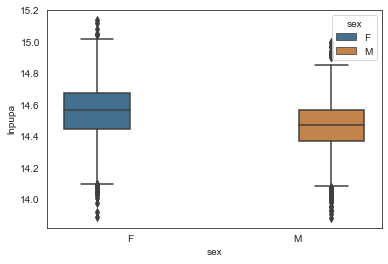

In [96]:
# make box plot of male and female wing size
sns.boxplot(x = 'sex', y = 'lnpupa', data=df_exp_fed, hue='sex', saturation=.5)
plt.show()

Females are larger than males in fed flies by 14.55630-14.46151 = 0.09479

#### I want to see if female pupa size varies a lot

In [100]:
# calculate mean size of pupa by sex and line for Day 0
df_exp_fed_mean = df_exp_fed.groupby(['line','sex'], as_index=False).lnpupa.mean()

In [104]:
# distribution of pupal size by sex
df_exp_fed_mean_F.head()

,line,sex,lnpupa
0,21,F,14.456279
2,26,F,14.675364
4,28,F,14.664133
6,31,F,14.653472
8,32,F,14.520754


In [116]:
# plot of female size against male size
df_exp_fed_mean_F = df_exp_fed_mean[(df_exp_fed_mean['sex']=="F")]
df_exp_fed_mean_F.rename(columns={'lnpupa':'F'}, inplace=True)

df_exp_fed_mean_F.head()

df_exp_fed_mean_M = df_exp_fed_mean[(df_exp_fed_mean['sex']=="M")]
df_exp_fed_mean_M.rename(columns={'lnpupa':'M'}, inplace=True)



pupa = pd.merge(df_exp_fed_mean_F, df_exp_fed_mean_M, on ='line', how = 'inner')
pupa.head(30)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,line,sex_x,F,sex_y,M
0,21,F,14.456279,M,14.540044
1,26,F,14.675364,M,14.559698
2,28,F,14.664133,M,14.598840
3,31,F,14.653472,M,14.508675
4,32,F,14.520754,M,14.376655
5,38,F,14.498479,M,14.459666
6,41,F,14.404523,M,14.278504
7,42,F,14.673466,M,14.561168
8,45,F,14.313798,M,14.220225
9,48,F,14.665619,M,14.602858


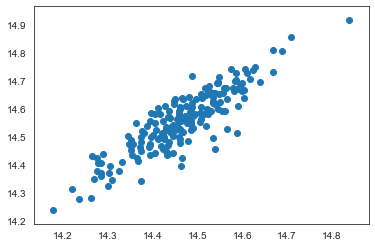

In [117]:
#plot
plt.scatter(pupa['M'] , pupa['F'])
plt.show()

In [91]:
#test for variance equality
df_exp_fed_F = df_exp_fed[(df_exp_fed['sex']=='F')]
df_exp_fed_M = df_exp_fed[(df_exp_fed['sex']=='M')]

In [92]:
wingF = df_exp_fed_F['lnwing'].to_numpy()
wingF = wingF[~numpy.isnan(wingF)]
wingF
wingM = df_exp_fed_M['lnwing'].to_numpy()
wingM

NameError: name 'numpy' is not defined

In [91]:
stats.ttest_ind(wingF, wingM)

Ttest_indResult(statistic=nan, pvalue=nan)

In [41]:

levene(df_exp_fed.lnwing, df_exp_fed_M.lnwing)

NameError: name 'levene' is not defined

In [44]:
#calculate average wing size by sex by line
df_exp_fed_groupmean = df_exp_fed.groupby(['line','sex'], as_index=False).mean()


In [81]:
df_exp_fed_groupmean

,line,sex,block,day_of_starvation,wing,cell,leg,legpow2,lnwing,lnleg,lnlegpow2
0,21,F,6.000000,0.745455,1.220906e+06,62.611111,936.331992,883648.257572,14.003323,6.837838,13.675676
1,21,M,6.000000,0.717391,1.063088e+06,67.266667,935.150238,880995.611202,13.864271,6.836921,13.673843
2,26,F,13.000000,0.951456,1.217339e+06,64.932039,899.288881,817371.773515,13.998656,6.796231,13.592462
3,26,M,13.000000,0.990099,1.022200e+06,73.376238,881.632186,782733.385475,13.827928,6.778255,13.556510
4,28,F,12.487805,1.195122,1.371723e+06,78.829268,983.513289,973445.399450,14.120568,6.888005,13.776009
...,...,...,...,...,...,...,...,...,...,...,...
381,908,M,7.000000,0.541667,9.367352e+05,89.916667,835.003454,702368.903643,13.736779,6.723720,13.447440
382,911,F,7.000000,0.940000,9.099719e+05,73.280000,808.518900,658519.468726,13.707247,6.691541,13.383083
383,911,M,7.000000,0.740000,7.857910e+05,81.140000,797.469909,639933.303412,13.564708,6.678310,13.356620
384,913,F,7.000000,1.071429,1.145185e+06,65.785714,927.614871,868647.906027,13.930377,6.827921,13.655843


In [ ]:
#Histogram showing the distribution of mean size female and mean size male

<Figure size 1280x800 with 0 Axes>

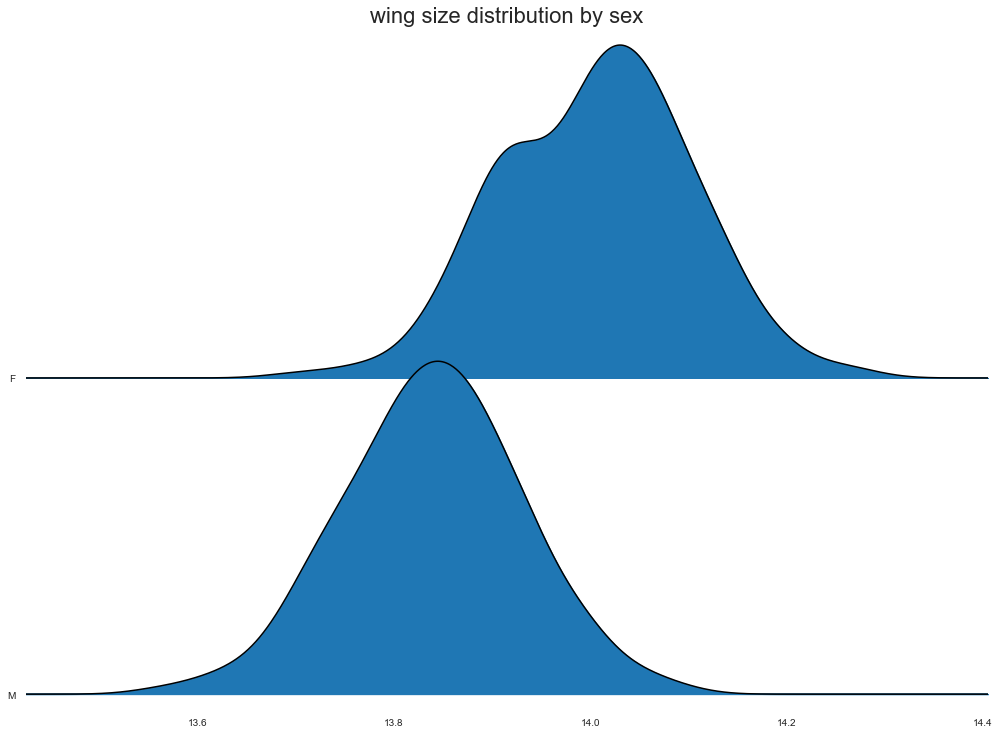

In [94]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df_exp_fed_groupmean, column='lnwing', by=['sex'], ylim='own', figsize=(14,10))

# Decoration
plt.title('wing size distribution by sex', fontsize=22)
plt.show()

In [96]:
Fwing= df_exp_fed_groupmean[(df_exp_fed_groupmean['sex'] == "F")]

F = stats.shapiro(Fwing['lnwing'])
F

(0.9945470094680786, 0.7071972489356995)

In [97]:
Mwing= df_exp_fed_groupmean[(df_exp_fed_groupmean['sex'] == "M")]

M = stats.shapiro(Mwing['lnwing'])
M

(0.9981694221496582, 0.9988638758659363)

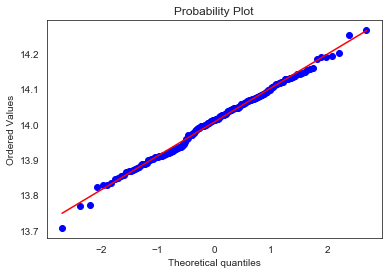

In [98]:
import numpy as np 
import pylab 
import scipy.stats as stats

  
stats.probplot(Fwing['lnwing'], dist="norm", plot=pylab)
pylab.show()

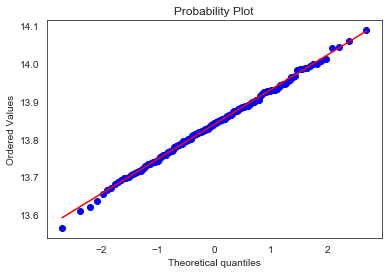

In [99]:
stats.probplot(Mwing['lnwing'], dist="norm", plot=pylab)
pylab.show()

[14.00332297]
[13.9986561]
[14.12056773]
[14.03867914]
[14.00953306]
[14.14445042]
[13.93987437]
[14.26534839]
[13.92332008]
[14.02546339]
[13.87138624]
[14.00594337]
[14.08568602]
[14.00817942]
[14.0262023]
[13.99423185]
[14.05738912]
[13.92330206]
[14.0502873]
[14.14087108]
[14.01168236]
[13.92668362]
[13.91088567]
[14.01244437]
[14.01590466]
[14.10420886]
[13.88854827]
[14.19288287]
[13.98478105]
[14.15791158]
[14.19089787]
[13.99706041]
[13.82894703]
[13.94411846]
[14.10132883]
[13.98774084]
[14.07947815]
[14.01562742]
[14.04550584]
[13.88597912]
[14.154954]
[13.86924215]
[14.07766729]
[13.92130334]
[13.95831479]
[14.07131494]
[14.04769255]
[14.07541808]
[14.01284534]
[13.98981277]
[14.25254343]
[14.04528509]
[14.10564926]
[13.84890652]
[13.85456542]
[14.14620173]
[13.90300742]
[13.97645926]
[14.12777423]
[14.09755793]
[14.0289623]
[13.77031886]
[13.90443951]
[13.90925759]
[14.03881081]
[13.96909208]
[14.05640354]
[13.90289746]
[13.99801003]
[13.98314316]
[13.9902315]
[14.09598726]

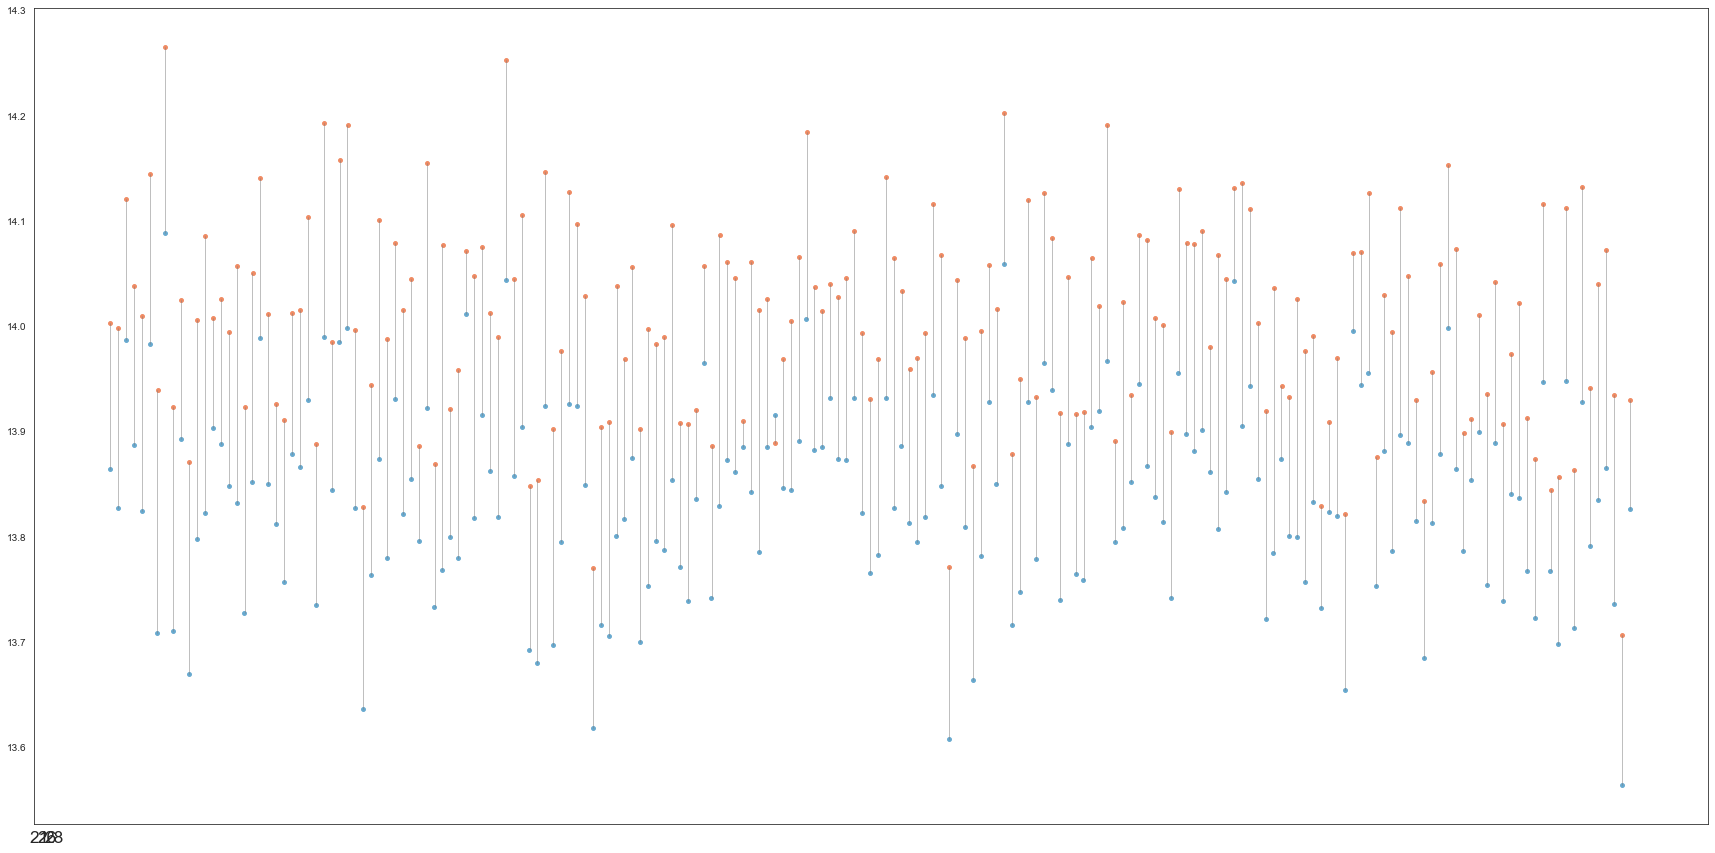

In [83]:
#I want to sort the Female values and reindex the lines by sorted female value, then use the order new order of lines to plot the graph
# or I want to sort the lines by SSD increasing

#plot representing the paired wing size average per line
fig, ax = plt.subplots(figsize=(30, 15))

# Set up list to track sites
lines = []
i = 10
for line, subdf in df_exp_fed_groupmean.groupby("line"):
    lines.append(line)
    # Get the values for male and female wings
    F = subdf.query('sex == "F"')['lnwing'].values
    M = subdf.query('sex == "M"')['lnwing'].values
    
    print(F)

    # Set up the x-axis values
    x1 = i #- .1
    x2 = i #+ .1

    # Plot the lines connecting the dots
    for Fi, Mi in zip(F,M):
        ax.plot([x1, x2], [ Fi, Mi], c='gray',linewidth=0.5)

    # Plot the points
    ax.scatter(len(M)*[x1-0.01], M, c='#67a9cf',
               s=15, label='Male')
    ax.scatter(len(F)*[x2+0.01], F, c='#ef8a62', 
               s=15, label='Female')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(lines, fontsize='xx-large')

### Hypothesis 2: However, the difference between females and males varies among lines (SSD genetic variation exists)

#### Some lines have signicantly female biased SSD

#### Some lines do not have significant SSD

#### Some lines have signicantly male biased SSD

### Hypothesis 3: Female size variation among lines is responsible for SSD variation

### Hypothesis 4: If we now look at different environments, SSD responds to the environement and we hypothesize that it is decreased when there is starvation.

### Hypothesis 5: However, SSD doesn't change by different degrees of starvation, SSD is the same when we starve larvae for 1 or 2 days.

## If we look at sex specific plasticity (SSP)

### Hypothesis 6: Plasticity in female is higher than plasticity in male, this is due to a large negative response in females

### Hypothesis 7: But this SSP varies among lineages

#### And some lineages have no SSP

#### Some have female biased SSP : where female wing size changes a more

### Some have male biased SSP: where male size changes more

### This variation in SSP is correlated with the variation of SSD: if SSD is larger, SSP will be larger

### But is this correlation due to female biased SSP and SSD? Meaning that the correlation present when both SSP and SSD are female biased?

Now that we have established that a variation of SSP and SSD is generally dues to female changes in size, is it the case if we examine specific traits?

## Trait Specific

In [ ]:
### Wing

In [ ]:
#summary of wing size
#df_exp.groupby(['day_of_starvation','sex'], as_index=False).lnwing.describe()

In [ ]:
### Leg

In [ ]:
#summary of leg wize
#df_exp.groupby(['day_of_starvation','sex'], as_index=False).lnlegpow2.describe()